### Using a TRILEGAL file for a given healpix, 
### produce maps with Mr - [Fe/H] priors 

In [1]:
%matplotlib inline
import sys
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import hstack
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats
from scipy import optimize
from scipy import interpolate 
from scipy.interpolate import griddata
from scipy.stats import gaussian_kde

In [2]:
## automatically reload any modules read below that might have changed (e.g. plots)
%reload_ext autoreload
%autoreload 2
# importing plotting and locus tools: 
sys.path.append('../src')
import LocusTools as lt
import BayesTools as bt
import PlotTools as pt

In [3]:
## TRILEGAL sims: read data file (such as Dani's three_pix_triout.dat)
trilegal = lt.readTRILEGAL()
# absolute intrinsic r band magnitude
trilegal['Mr'] = trilegal['rmag'] - trilegal['Ar'] - trilegal['DM']  
# NB TRILEGAL sample is defined by r<27.5

reading from default file: ../data/three_pix_triout.dat


r= 13.5 to 14.5 N= 1292472 Ns= 3526


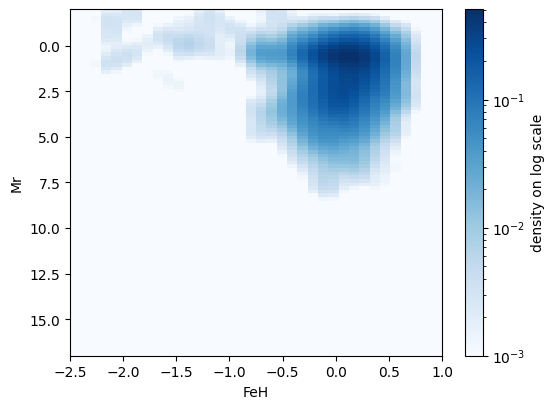

r= 14.0 to 15.0 N= 1292472 Ns= 5062


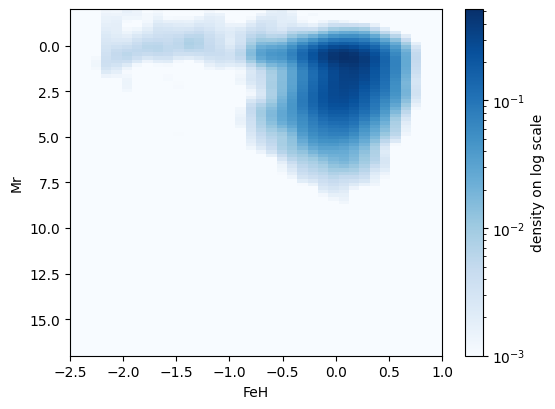

r= 14.5 to 15.5 N= 1292472 Ns= 6848


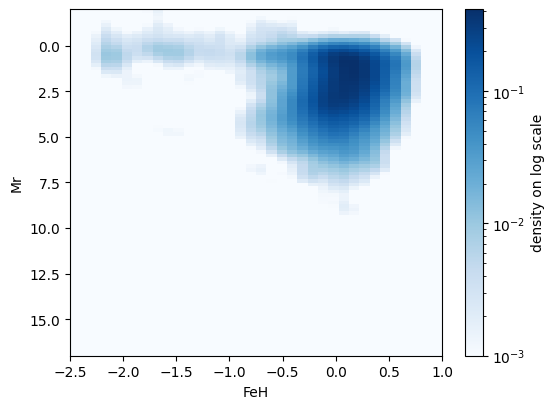

r= 15.0 to 16.0 N= 1292472 Ns= 9147


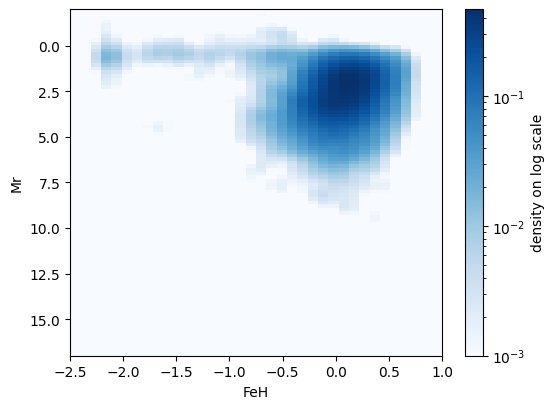

r= 15.5 to 16.5 N= 1292472 Ns= 12321


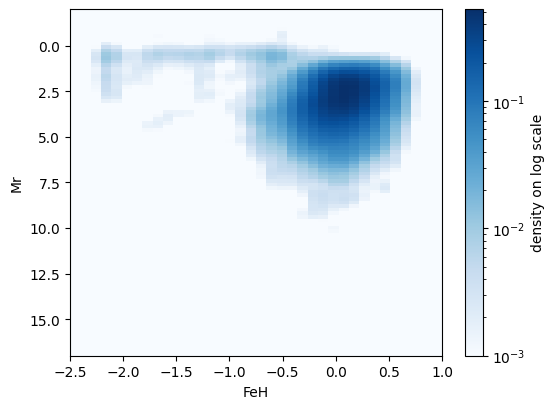

r= 16.0 to 17.0 N= 1292472 Ns= 16492


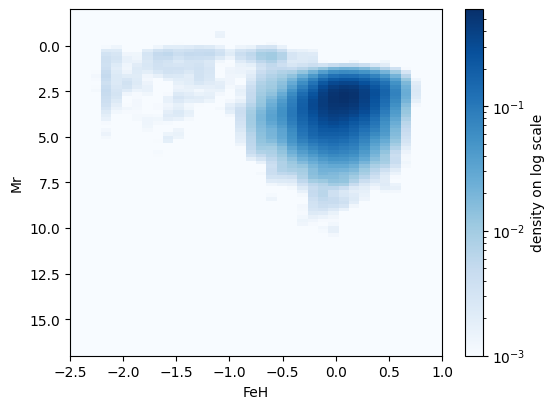

r= 16.5 to 17.5 N= 1292472 Ns= 21356


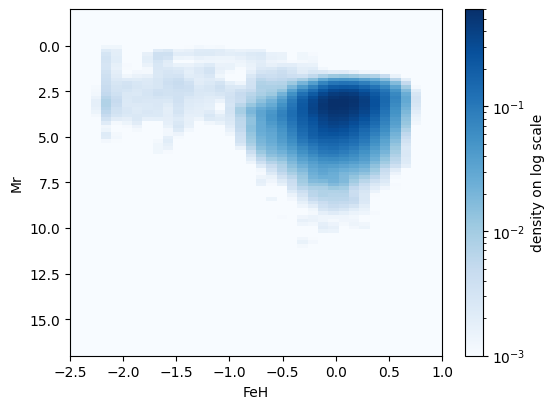

r= 17.0 to 18.0 N= 1292472 Ns= 26241


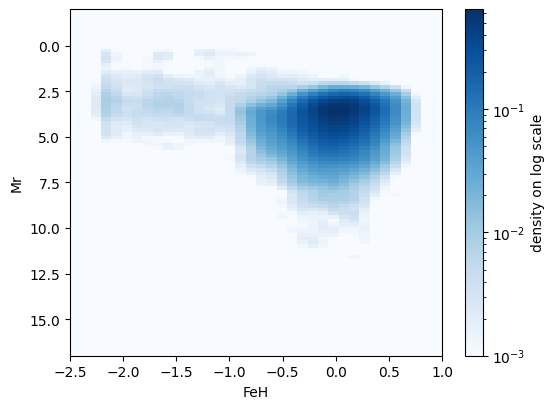

r= 17.5 to 18.5 N= 1292472 Ns= 31277


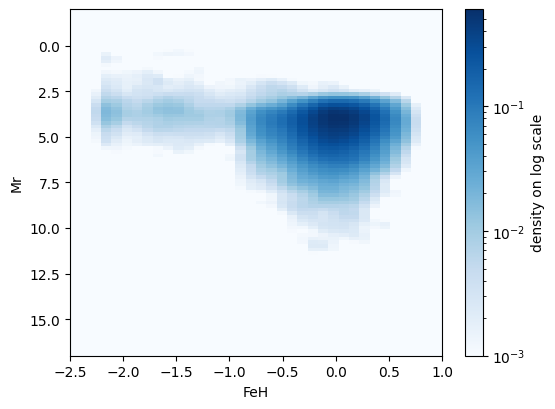

r= 18.0 to 19.0 N= 1292472 Ns= 36436


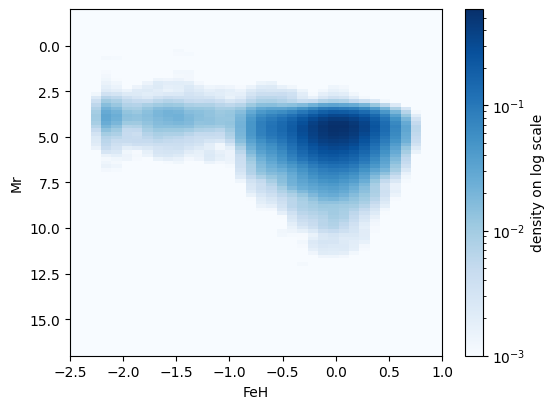

r= 18.5 to 19.5 N= 1292472 Ns= 41899


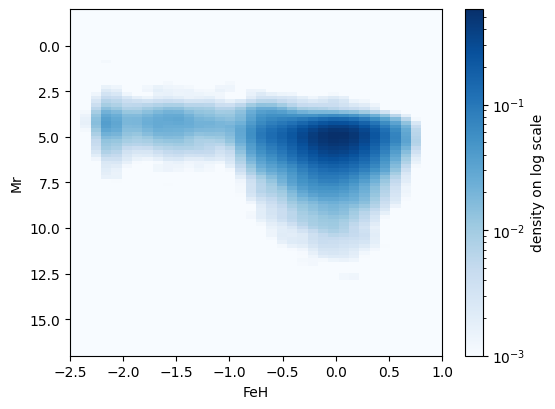

r= 19.0 to 20.0 N= 1292472 Ns= 46880


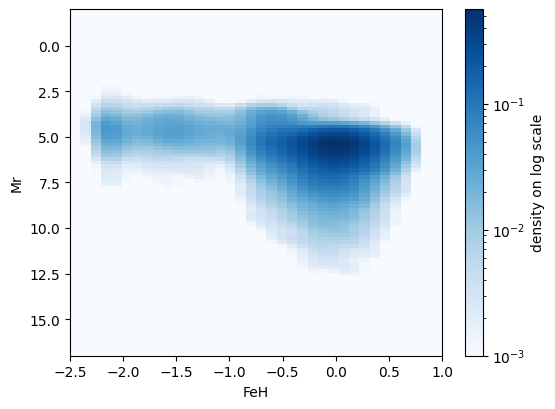

r= 19.5 to 20.5 N= 1292472 Ns= 51259


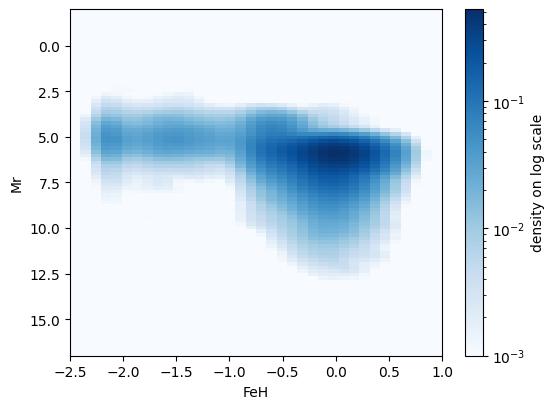

r= 20.0 to 21.0 N= 1292472 Ns= 55714


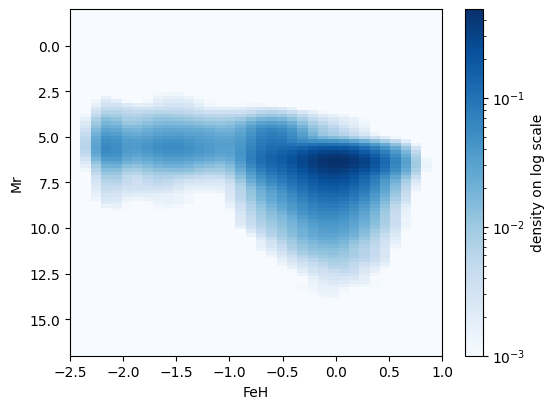

r= 20.5 to 21.5 N= 1292472 Ns= 60129


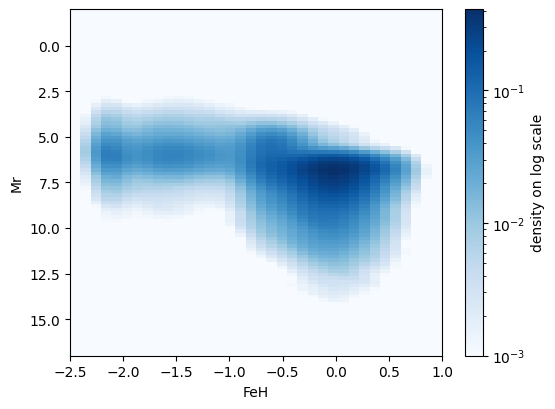

r= 21.0 to 22.0 N= 1292472 Ns= 66081


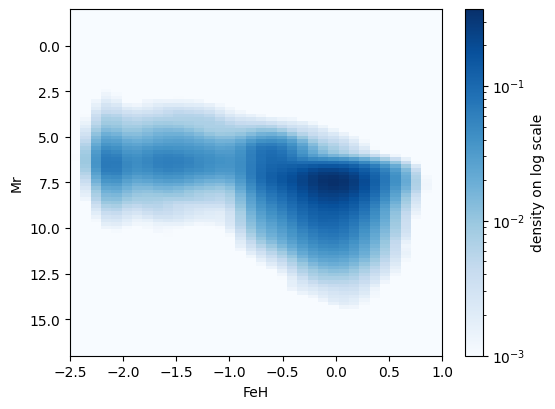

r= 21.5 to 22.5 N= 1292472 Ns= 75589


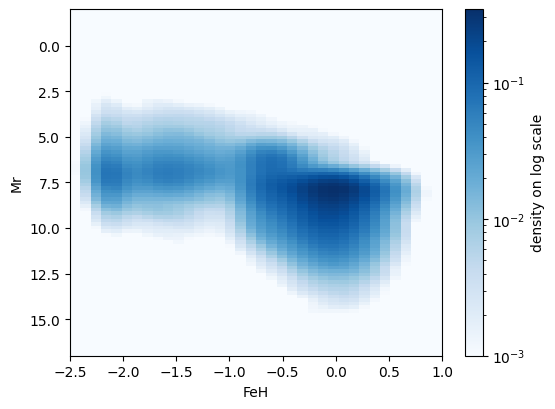

r= 22.0 to 23.0 N= 1292472 Ns= 89186


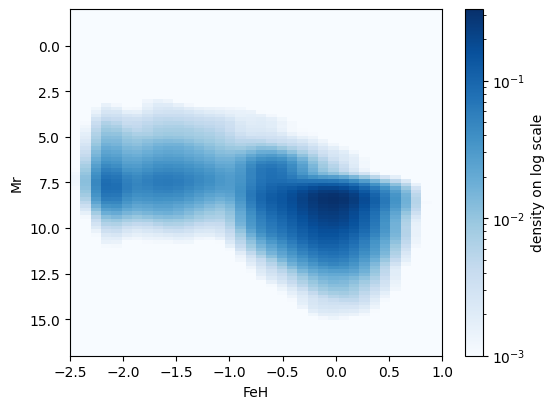

r= 22.5 to 23.5 N= 1292472 Ns= 107687


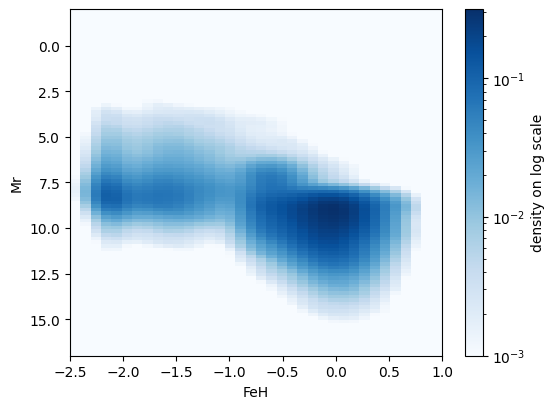

r= 23.0 to 24.0 N= 1292472 Ns= 131609


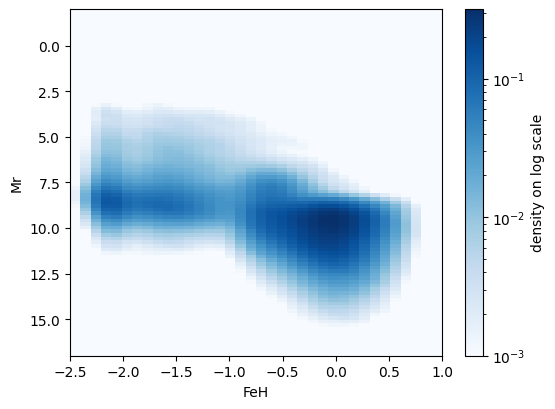

r= 23.5 to 24.5 N= 1292472 Ns= 160265


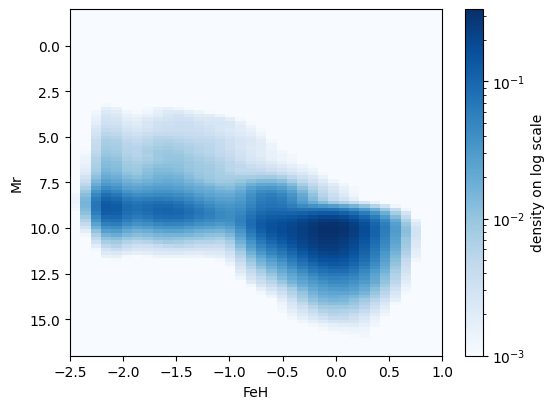

r= 24.0 to 25.0 N= 1292472 Ns= 190469


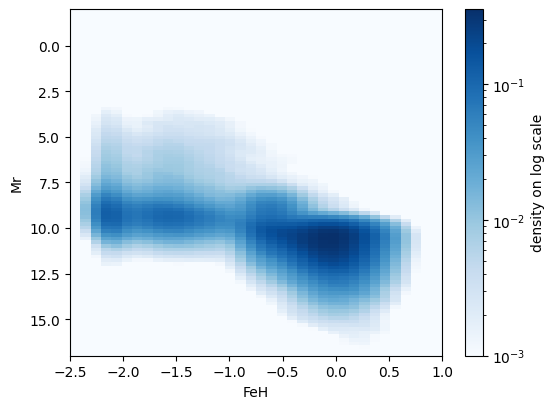

r= 24.5 to 25.5 N= 1292472 Ns= 217594


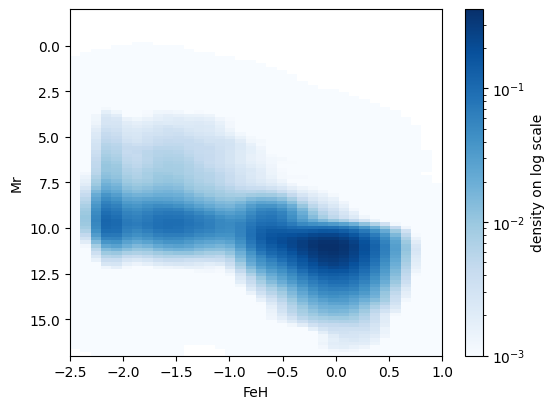

r= 25.0 to 26.0 N= 1292472 Ns= 238509


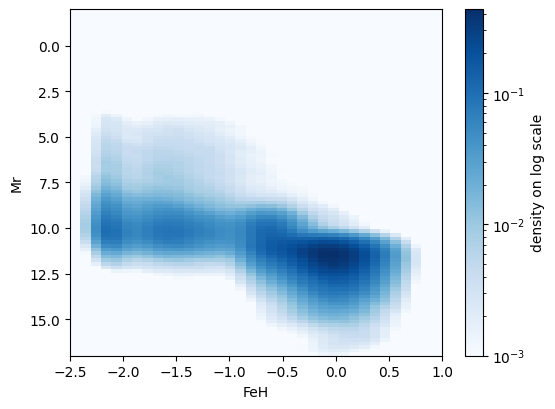

r= 25.5 to 26.5 N= 1292472 Ns= 250429


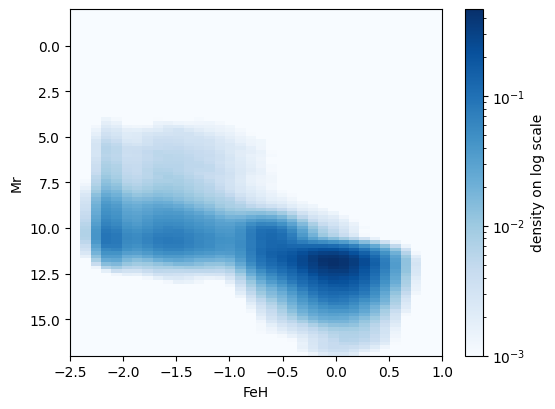

r= 26.0 to 27.0 N= 1292472 Ns= 252722


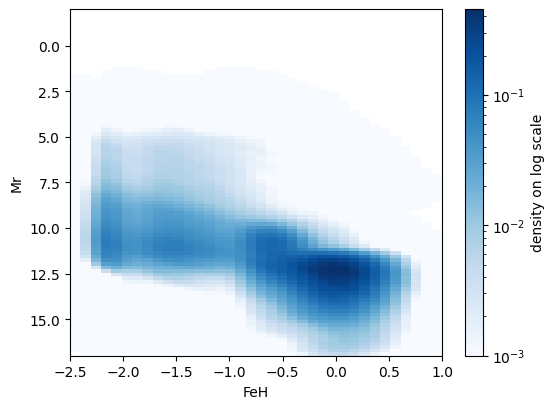

r= 26.5 to 27.5 N= 1292472 Ns= 248665


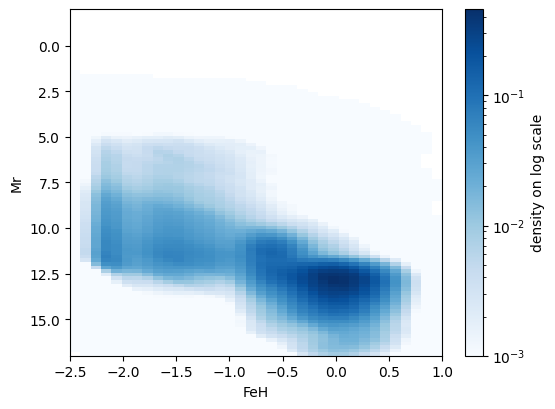

In [4]:
rootname = 'healPix1_priors'   # here healPix1 denotes Dani's three_pix_triout.dat file
# NB map parameters are set in dumpPriorMaps(), by calling getBayesConstants()
bt.dumpPriorMaps(trilegal, rootname)

In [6]:
# test by reading back
bc = bt.getBayesConstants()
rmagMin = bc['rmagMin']
rmagMax = bc['rmagMax'] 
rmagNsteps = bc['rmagNsteps']  
priors, rmagBinWidth = bt.readPrior(rmagMin, rmagMax, rmagNsteps,rootname)

In [7]:
rmagBinWidth

0.5

In [8]:
priors[0]['metadata'][0], priors[0]['metadata'][1], priors[0]['metadata'][2]

(-2.5, 1.0, 36.0)

map for rObs = 19 map index = 10


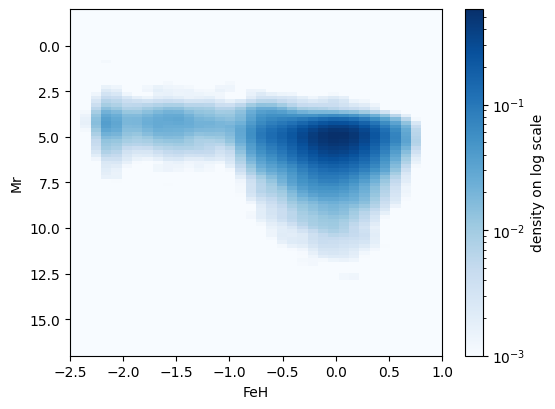

In [9]:
# plot one map
rObs = 19
mapIndex = bt.getPriorMapIndex(rObs) 
print('map for rObs =', rObs, 'map index =', mapIndex)
pt.restore2Dmap(priors[mapIndex], logScale=True)

map for rObs = 25 map index = 22


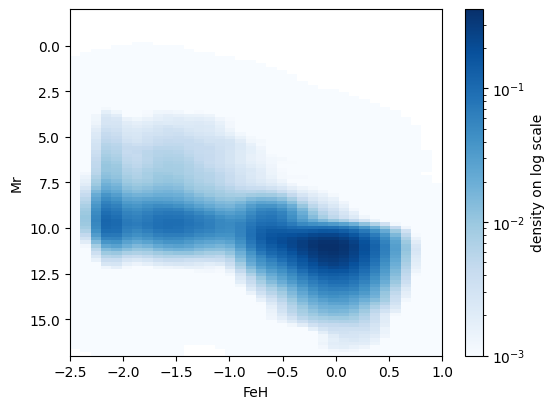

In [10]:
# plot one map
rObs = 25
mapIndex = bt.getPriorMapIndex(rObs) 
print('map for rObs =', rObs, 'map index =', mapIndex)
pt.restore2Dmap(priors[mapIndex], logScale=True)